In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from itertools import combinations
import efficient_apriori
from efficient_apriori import apriori


## Market Basket Analysis (MBA)

pd.set_option('display.max_columns', None)
aisles = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\aisles\aisles.csv')
departments = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\departments\departments.csv')
prod_prior = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\order_products__prior\order_products__prior.csv')
prod_train = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\order_products__train\order_products__train.csv')
orders = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\orders\orders.csv')
products = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\products\products.csv')
sample_sub = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\sample_submission\sample_submission.csv')

In [2]:
## Merge the columns 

prod_prior = prod_prior.merge(orders, on='order_id', how='left')
prod_prior = prod_prior.merge(products, on='product_id', how='left')
prod_prior = prod_prior.merge(aisles, on='aisle_id', how='left')
prod_prior = prod_prior.merge(departments, on='department_id', how='left')

In [3]:
# Usando groupby com agg para criar listas de produtos por order_id
grouped = prod_prior.groupby('order_id')['product_id'].agg(list).reset_index().rename(columns={'order_id': 'ID_Order', 'product_id': 'ID_Product'})



In [4]:
grouped

,ID_Order,ID_Product
0,2,"[33120, 28985, 9327, 45918, 30035, 17794, 4014..."
1,3,"[33754, 24838, 17704, 21903, 17668, 46667, 174..."
2,4,"[46842, 26434, 39758, 27761, 10054, 21351, 225..."
3,5,"[13176, 15005, 47329, 27966, 23909, 48370, 132..."
4,6,"[40462, 15873, 41897]"
...,...,...
3214869,3421079,[30136]
3214870,3421080,"[27845, 4932, 18811, 41950, 31717, 12935, 2512..."
3214871,3421081,"[38185, 12218, 32299, 3060, 20539, 35221, 12861]"
3214872,3421082,"[17279, 12738, 16797, 43352, 32700, 12023, 47941]"


In [5]:

prod_prior

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0,Banana,24,4,fresh fruits,produce


1 - Qual a o número de pedidos mais frequentes entre os usuários?

In [6]:
freq_pedidos = orders.groupby('user_id')['order_number'].agg('max').reset_index()
freq_pedidos = freq_pedidos['order_number'].value_counts()
freq_pedidos.head()

order_number
4    23986
5    19590
6    16165
7    13850
8    11700
Name: count, dtype: int64

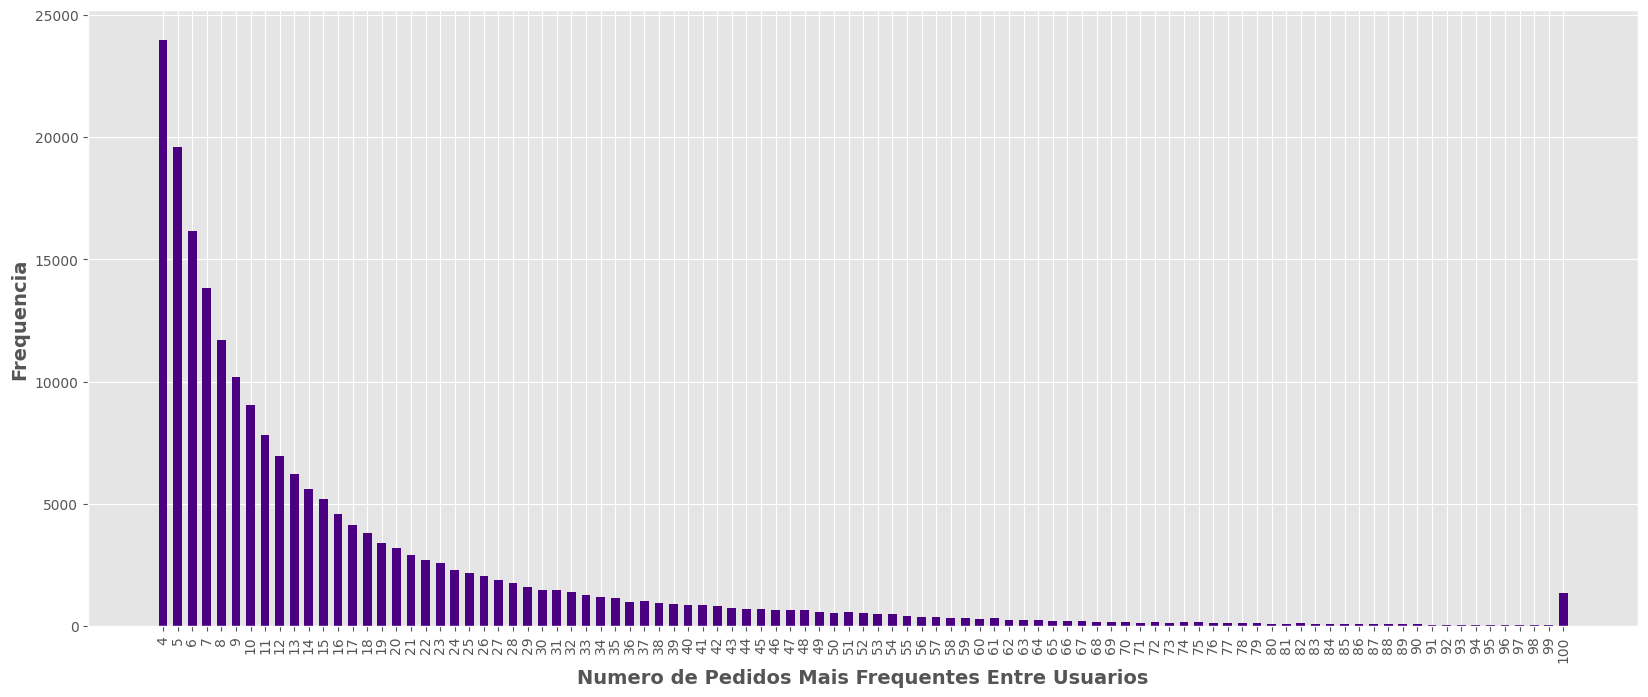

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.bar(freq_pedidos.index, freq_pedidos.values, color='indigo', width=0.6)
plt.xticks(freq_pedidos.index, rotation='vertical')
plt.ylabel('Frequencia', fontsize= 14, fontweight= 'bold')
plt.xlabel('Numero de Pedidos Mais Frequentes Entre Usuarios', fontsize=14, fontweight='bold')
plt.show()

2 - Qual dia da semana tem o maior número de pedidos?

In [8]:
x = list(range(0,7))
y = [orders[orders['order_dow']==0].shape[0],
     orders[orders['order_dow']==1].shape[0],
     orders[orders['order_dow']==2].shape[0],
     orders[orders['order_dow']==3].shape[0],
     orders[orders['order_dow']==4].shape[0],
     orders[orders['order_dow']==5].shape[0],
     orders[orders['order_dow']==6].shape[0]]

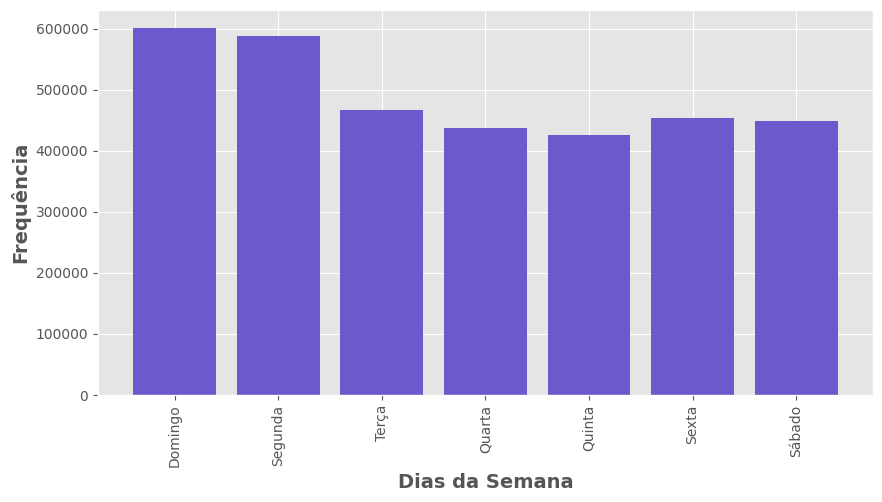

In [9]:
plt.figure(figsize=(10,5))
plt.bar(x,y, color='slateblue')
plt.xlabel('Dias da Semana', fontsize=14, fontweight='bold')
plt.ylabel('Frequência', fontsize=14, fontweight='bold')
plt.xticks(x,['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'], rotation='vertical')
plt.show()

3 - Qual hora do dia tem maior número de  pedidos?

In [10]:
x = list(range(0,24))
y = []
for i in range(24):
    y.append(orders[orders['order_hour_of_day']==i].shape[0])

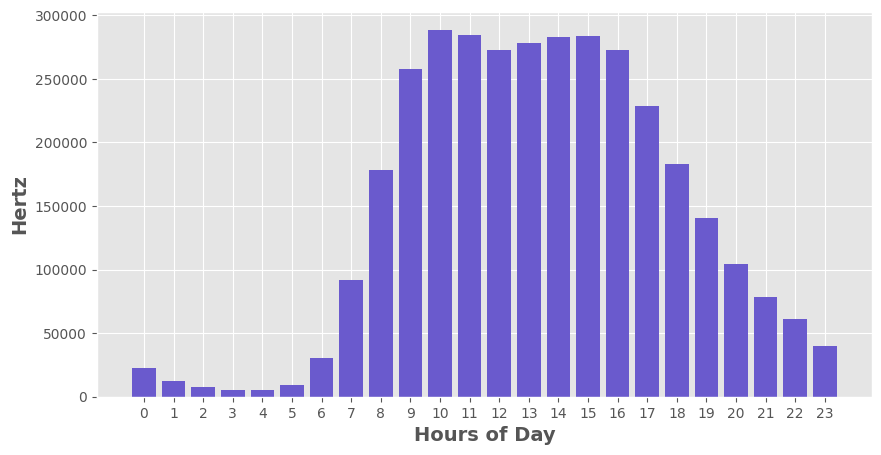

In [11]:
plt.figure(figsize=(10,5))
plt.bar(x, y, color='slateblue') 
plt.xlabel('Hours of Day', fontsize=14, fontweight='bold')
plt.ylabel('Hertz', fontsize=14, fontweight='bold')
plt.xticks(x)
plt.show()

4 - Qual departamento carrega o maior número de pedidos?

In [12]:
freq_dep = prod_prior['department'].value_counts()

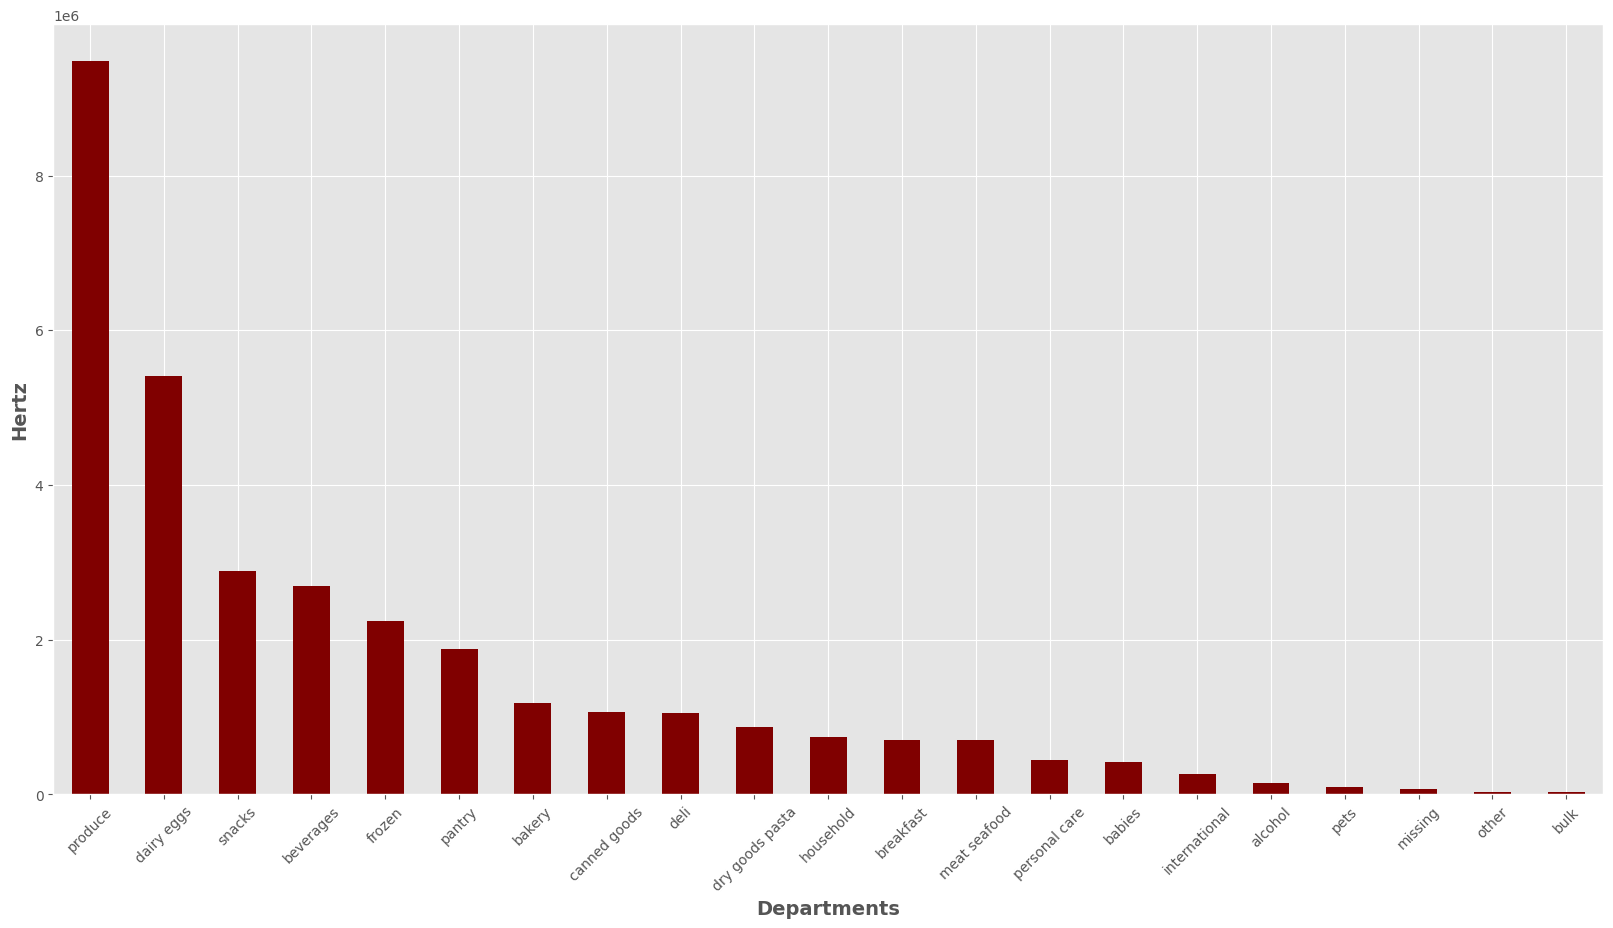

In [13]:
fig = plt.figure(figsize=(20,10))
freq_dep.plot(kind='bar', color='maroon')
plt.xlabel('Departments', fontsize=14, fontweight='bold')
plt.ylabel('Hertz', fontsize=14, fontweight='bold')
plt.xticks( rotation=45)
plt.show()

5 - Quais os 20 principais corredores por frequência de pedidos?

In [14]:
freq_aisles = prod_prior['aisle'].value_counts()

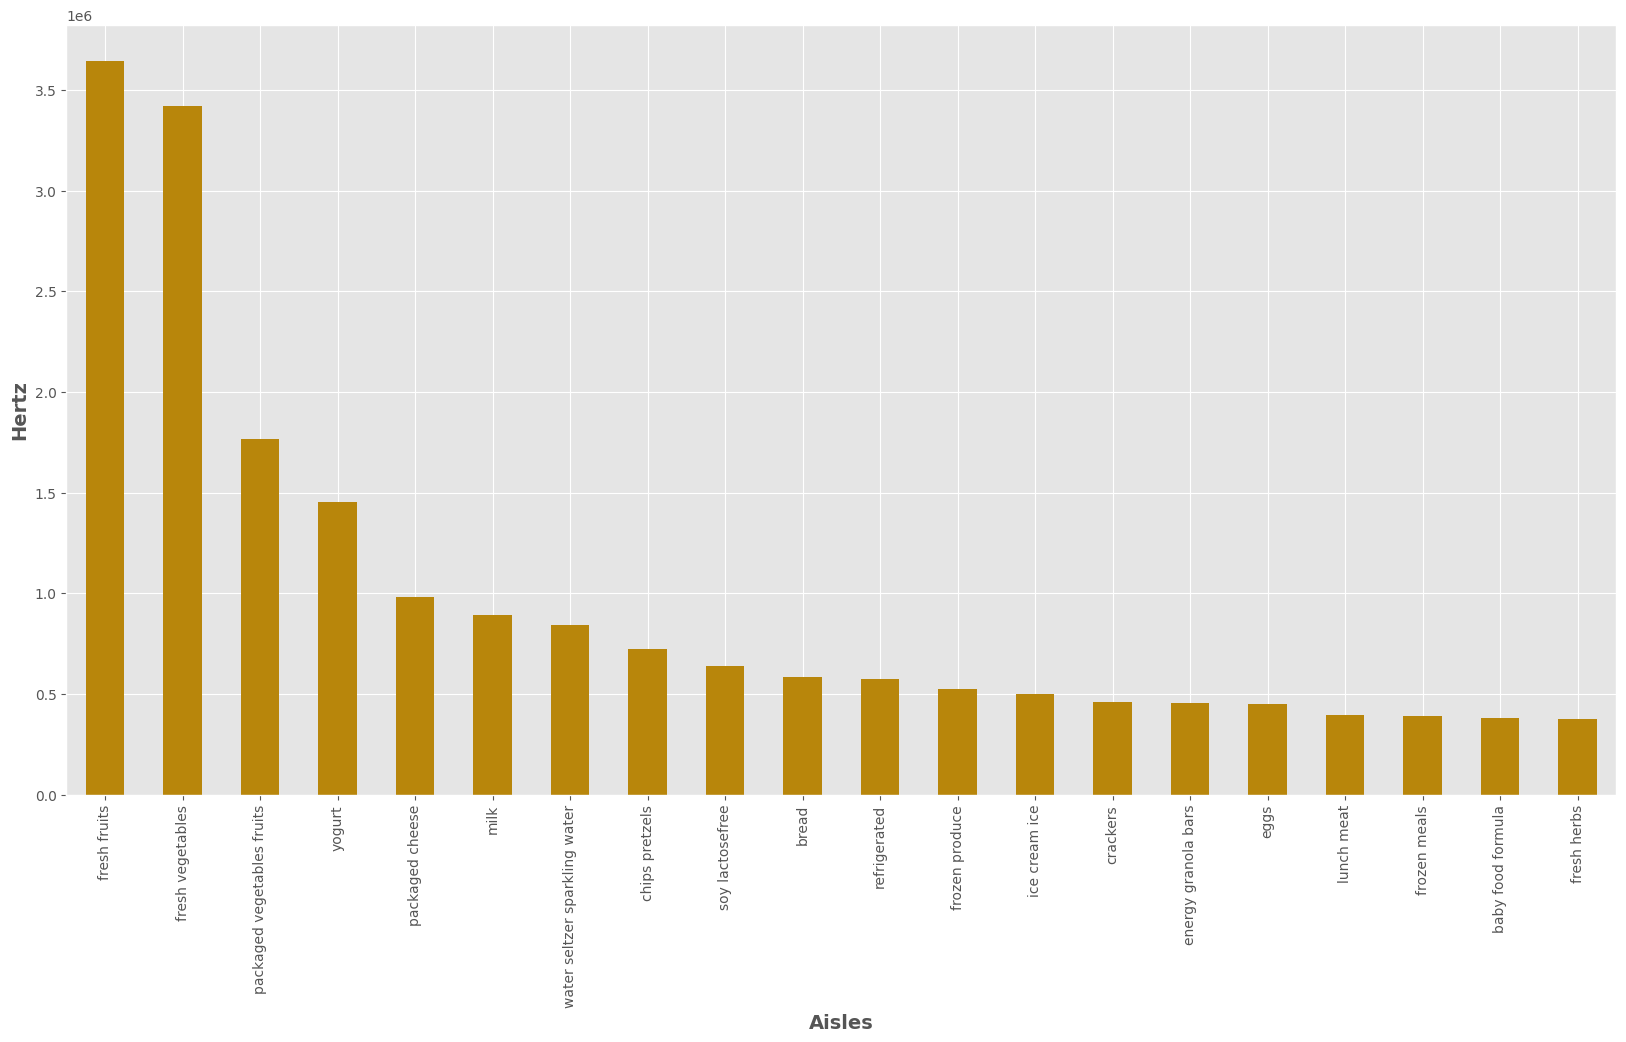

In [15]:
plt.figure(figsize=(20,10))
freq_aisles[0:20].plot(kind='bar', color='darkgoldenrod')
plt.xlabel('Aisles', fontsize=14, fontweight='bold')
plt.ylabel('Hertz', fontsize=14, fontweight='bold')
plt.xticks( rotation=90)
plt.show()

6 - Quais os 20 principais produtos por frequência de pedidos?

In [16]:
major_prod = prod_prior['product_name'].value_counts()


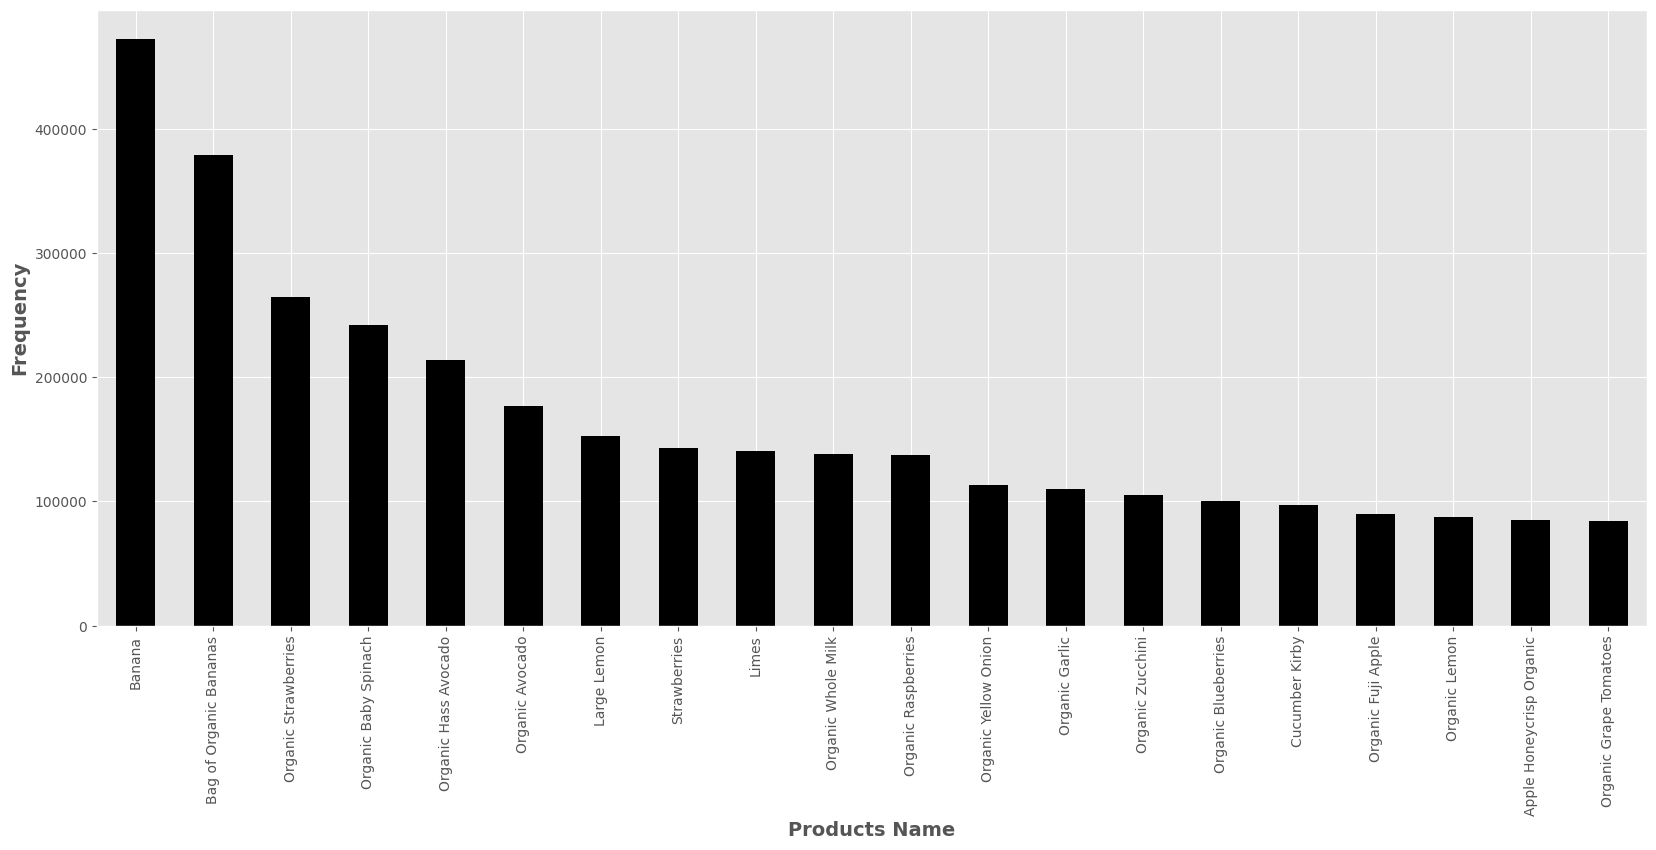

In [17]:
plt.figure(figsize=(20,8))
major_prod[0:20].plot(kind='bar', color='black')
plt.xlabel('Products Name', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.show()

7 - Analise de novos pedidos semelhantes aos pedidos anteriores

In [18]:
again = prod_prior.groupby('product_name')['reordered'].agg(['count', 'sum']).rename(columns={'count':'total','sum':'reorders'})
again = again.sort_values('total', ascending=False).reset_index()
again.head()

,product_name,total,reorders
0,Banana,472565,398609
1,Bag of Organic Bananas,379450,315913
2,Organic Strawberries,264683,205845
3,Organic Baby Spinach,241921,186884
4,Organic Hass Avocado,213584,170131


In [19]:
re20 = again['reorders'][0:20].tolist()
to20 = again['total'][0:20].tolist()
pro20 = again['product_name'][0:20].tolist()

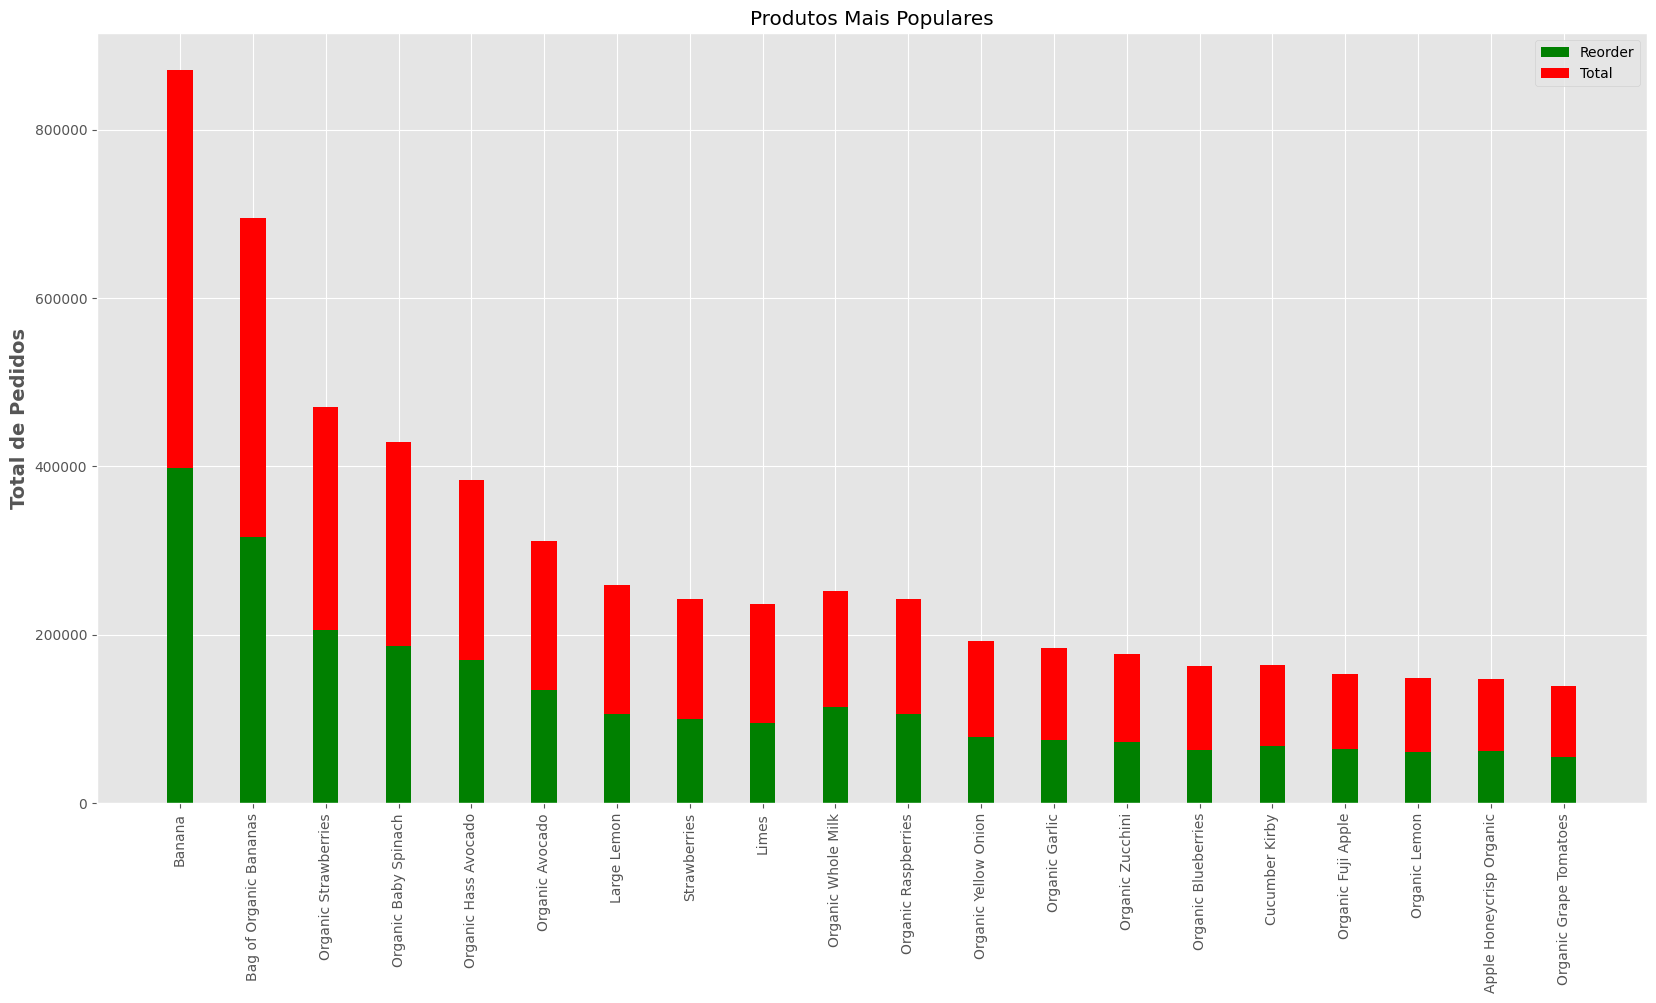

In [20]:
width = 0.35
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(pro20, re20, width, label='Reorder', color='green')
ax.bar(pro20, to20, width, bottom=re20, label='Total', color='red')
ax.set_ylabel('Total de Pedidos', fontsize=14, fontweight='bold')
ax.legend()
ax.set_title('Produtos Mais Populares')
plt.xticks(rotation=90)
plt.show()

8 - Análise de reorder por departamento ao longo do tempo

In [21]:
dep_reor = prod_prior.groupby('department')['reordered'].agg('mean').reset_index()
dep_reor.head()

,department,reordered
0,alcohol,0.569924
1,babies,0.578971
2,bakery,0.628141
3,beverages,0.653460
4,breakfast,0.560922


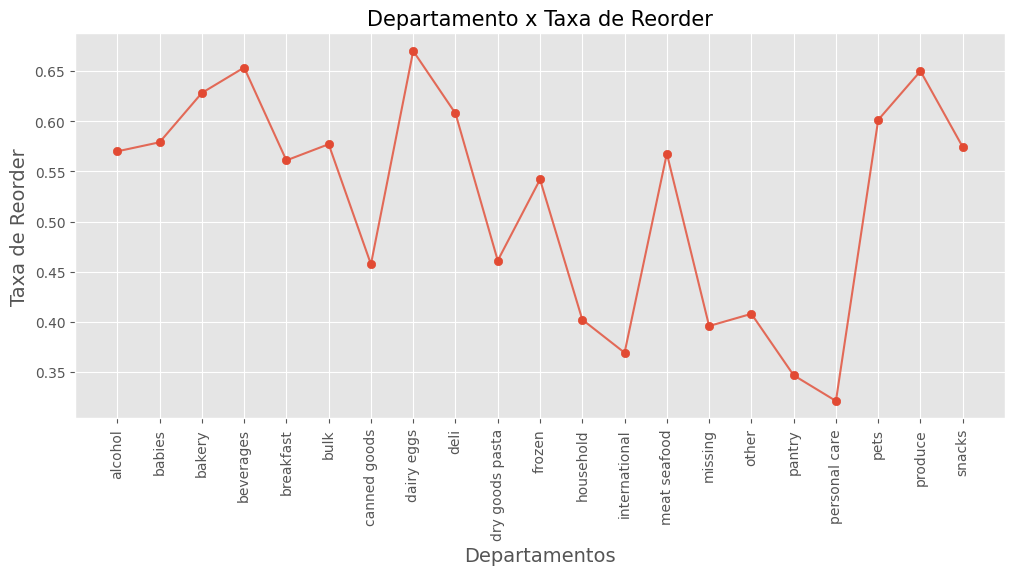

In [22]:
plt.figure(figsize=(12,5))
plt.plot(list(dep_reor['department']),dep_reor['reordered'].values, alpha=0.8)
plt.scatter(list(dep_reor['department']), dep_reor['reordered'].values)
plt.xlabel('Departamentos', fontsize=14)
plt.ylabel('Taxa de Reorder', fontsize=14)
plt.title('Departamento x Taxa de Reorder', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

9 - Analise de Reorder e Pedidos

In [23]:
# Definir o tamanho do chunk (exemplo: 1 milhão de linhas por vez)
chunksize = 10**6

# Inicializar listas para armazenar os resultados dos chunks
a_20_list = []
b_20_list = []
c_20_list = []

# Iterar sobre o DataFrame em pedaços
for start in range(0, len(prod_prior), chunksize):
    chunk = prod_prior.iloc[start:start + chunksize]
    
    # Agrupamento dentro de cada chunk
    ped_reo = chunk.groupby('department')['reordered'].agg(['count', 'sum']).rename(columns={'count':'total', 'sum':'reorders'})
    ped_reo = ped_reo.sort_values('total', ascending=False).reset_index()

    # Adicionar resultados dos 20 principais registros em cada chunk
    a_20_list.extend(ped_reo['total'].head(20).to_list())
    b_20_list.extend(ped_reo['reorders'].head(20).to_list())
    c_20_list.extend(ped_reo['department'].head(20).to_list())

# Depois de processar todos os chunks, as listas contêm os dados acumulados
a_20 = a_20_list[:20]  # Seleciona os 20 principais no total
b_20 = b_20_list[:20]
c_20 = c_20_list[:20]


In [24]:
## Without Chunks
# ped_reo = prod_prior.groupby('department')['reordered'].agg(['count','sum']).rename(columns={'count':'total', 'sum':'reorders'})
# ped_reo = ped_reo.sort_values('total', ascending=False).reset_index()

# a_20 = list(ped_reo['total'][0:20])
# b_20 = list(ped_reo['reorders'][0:20])
# c_20 = list(ped_reo['department'][0:20])

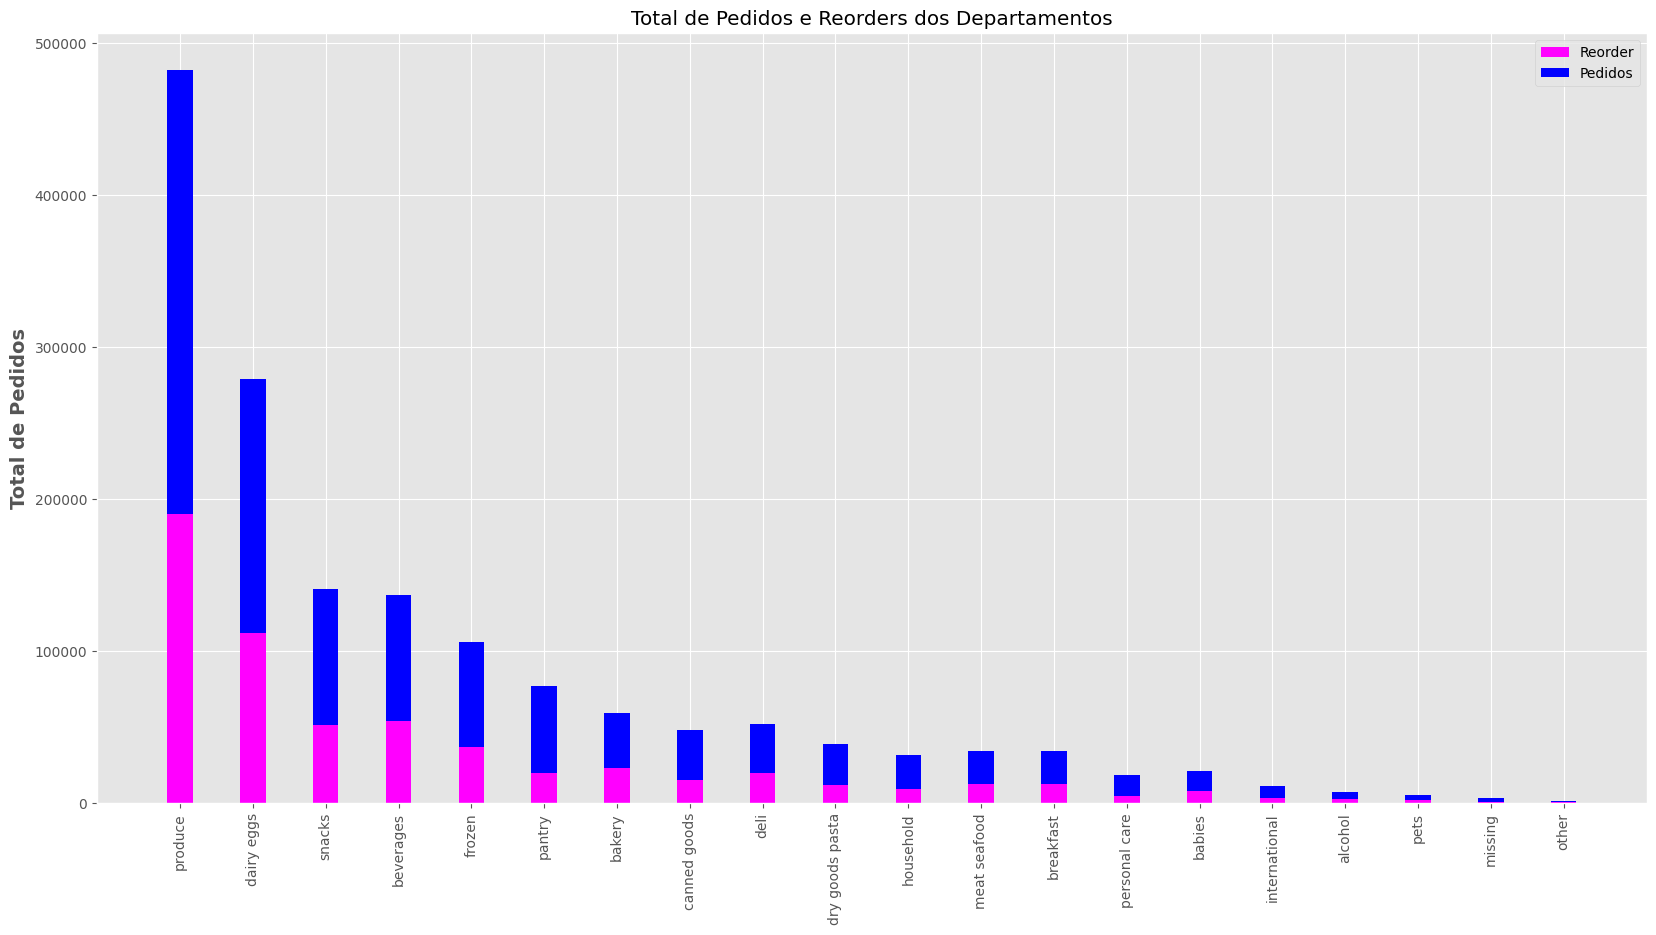

In [25]:
width=0.35
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(c_20, b_20, width, label='Reorder', color='magenta')
ax.bar(c_20, a_20, width, bottom=b_20, label='Pedidos', color='blue')
ax.set_ylabel('Total de Pedidos', fontsize=14, fontweight='bold')
ax.legend()
ax.set_title('Total de Pedidos e Reorders dos Departamentos')
plt.xticks(rotation=90)
plt.show()

10 - Análise de Reorder Por Corredor (média)

In [26]:
re_ais = prod_prior.groupby('aisle')['reordered'].agg('mean').reset_index()
re_ais.head()

,aisle,reordered
0,air fresheners candles,0.309052
1,asian foods,0.351132
2,baby accessories,0.550980
3,baby bath body care,0.295770
4,baby food formula,0.590259


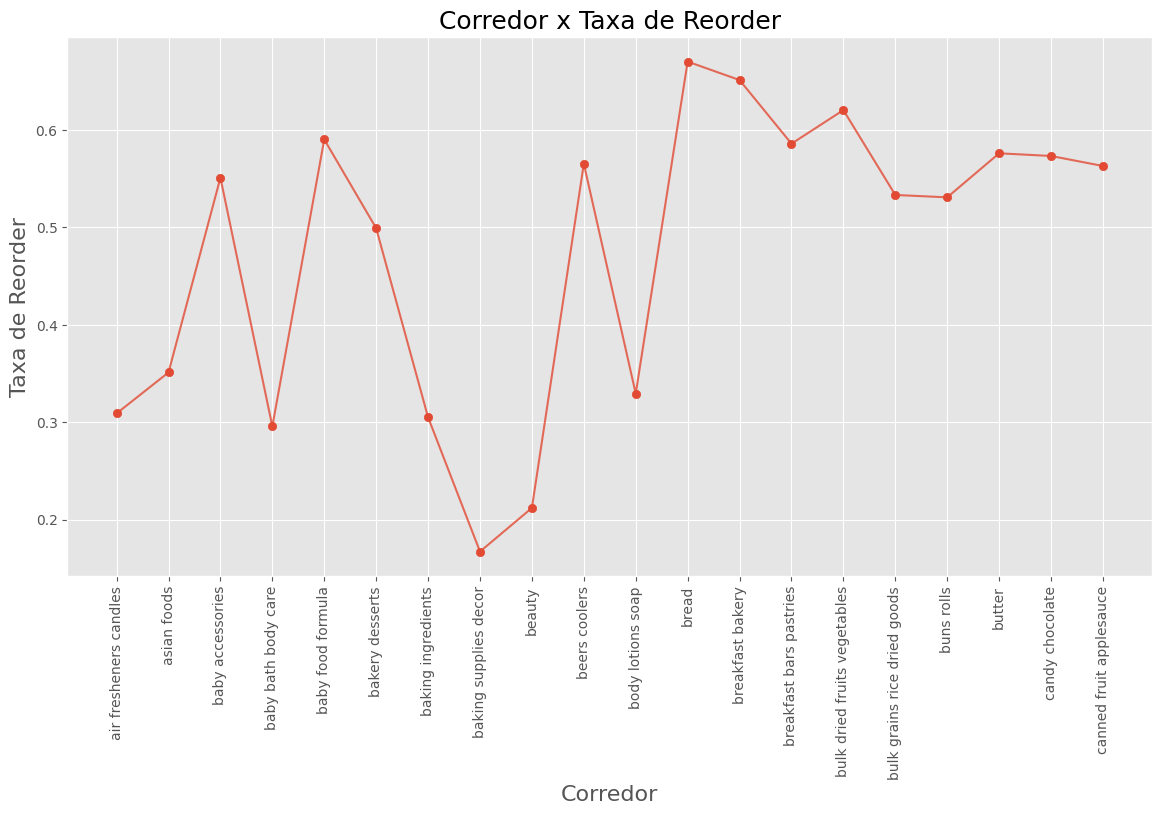

In [27]:
plt.figure(figsize=(14,7))
plt.plot(list(re_ais['aisle'][0:20]), re_ais['reordered'].values[0:20], alpha=0.8)
plt.scatter(list(re_ais['aisle'][0:20]), re_ais['reordered'].values[0:20])
plt.ylabel('Taxa de Reorder', fontsize=16)
plt.xlabel('Corredor', fontsize=16)
plt.title('Corredor x Taxa de Reorder', fontsize=18)
plt.xticks(rotation=90)
plt.show()

11 - Análise de Reorder Por Corredor (total)

In [28]:
re_ais_t = prod_prior.groupby('aisle')['reordered'].agg(['count','sum']).rename(columns={'count':'total', 'sum':'reorders'})
re_ais_t = re_ais_t.sort_values('total', ascending=False).reset_index()

total = list(re_ais_t['total'][0:20])
reorders = list(re_ais_t['reorders'][0:20])
labels = list(re_ais_t['aisle'][0:20])

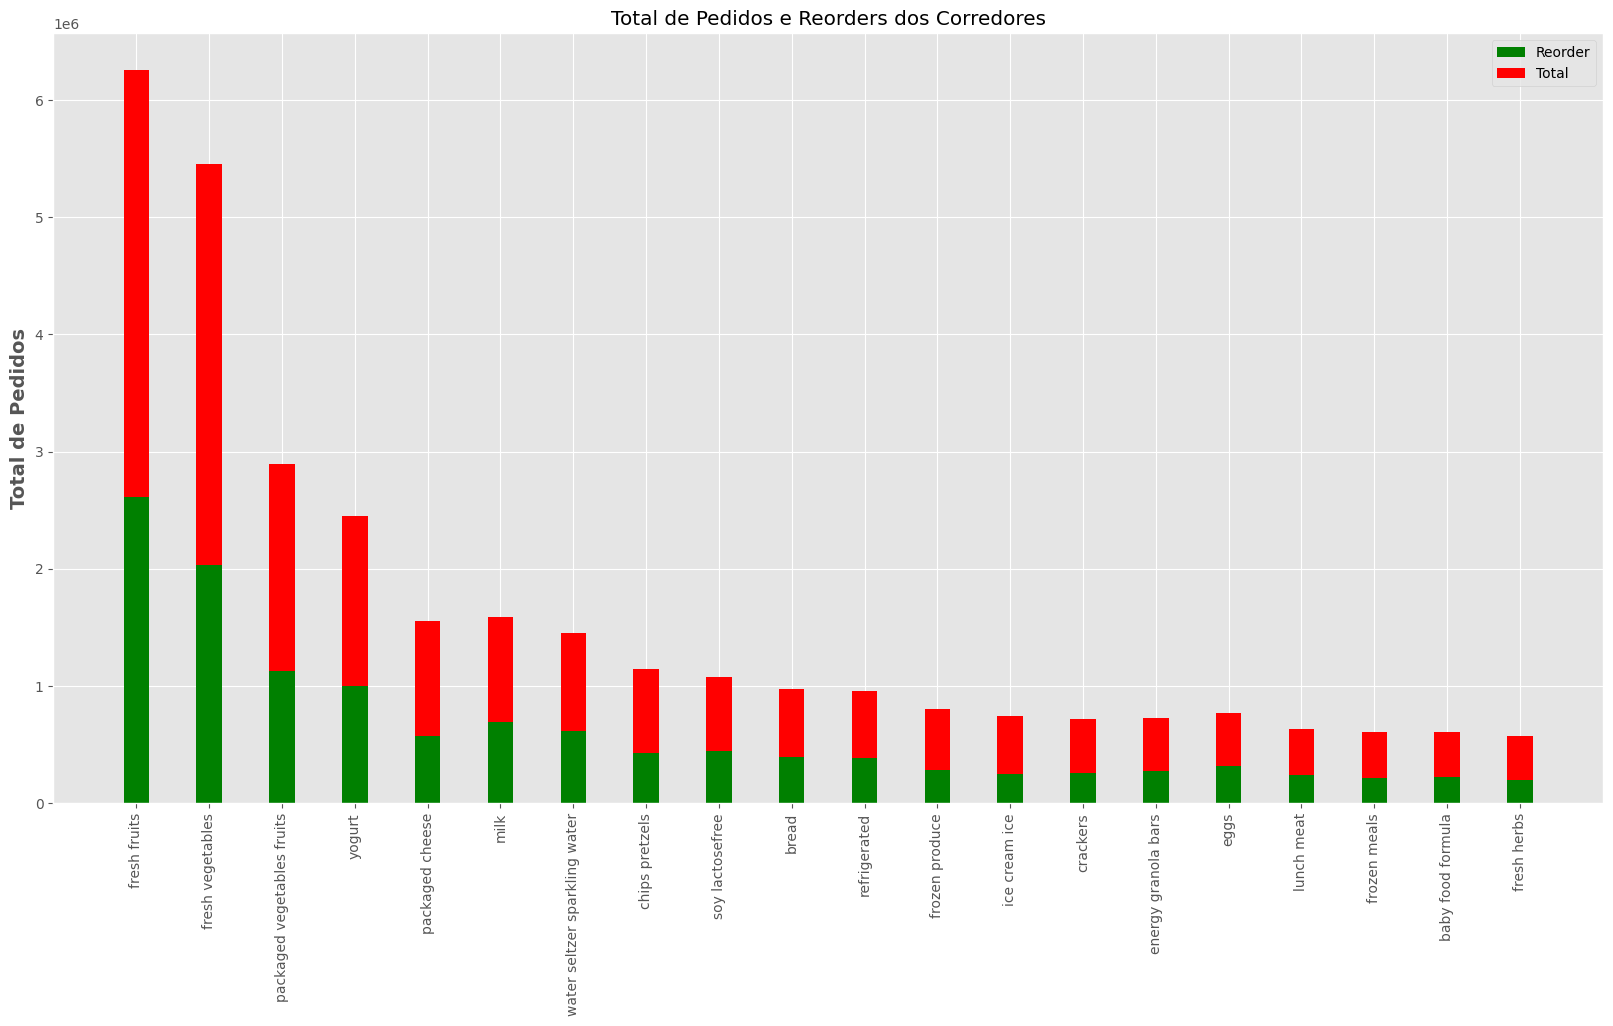

In [29]:
width=0.35
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(labels, reorders, width, label='Reorder', color='green')
ax.bar(labels, total, width, bottom=reorders, label='Total', color='red')
ax.set_ylabel('Total de Pedidos', fontsize=14, fontweight='bold')
ax.legend()
ax.set_title('Total de Pedidos e Reorders dos Corredores')
plt.xticks(rotation=90)
plt.show()

12 - Qual a relação entre a ordem de adição dos produtos ao carrinho e a proporção de novos pedidos (média)

In [31]:
import shutup ; shutup.please()

In [32]:
prod_prior['add_to_cart_order_mod'] = prod_prior['add_to_cart_order'].copy()
prod_prior['add_to_cart_order_mod'].loc[prod_prior['add_to_cart_order_mod']>70] = 70

rel = prod_prior.groupby('add_to_cart_order_mod')['reordered'].agg('mean').reset_index()

rel.head(10)

,add_to_cart_order_mod,reordered
0,1,0.677533
1,2,0.676251
2,3,0.658037
3,4,0.636958
4,5,0.617383
5,6,0.600420
6,7,0.585687
7,8,0.573247
8,9,0.561474
9,10,0.551018


Algorítmo Apriori com Support = 0.01 e Confidence = 0.2

In [35]:
transactions_tup = [tuple(row) for row in grouped['ID_Product'].tolist()]
print(transactions_tup[:5])

[(33120, 28985, 9327, 45918, 30035, 17794, 40141, 1819, 43668), (33754, 24838, 17704, 21903, 17668, 46667, 17461, 32665), (46842, 26434, 39758, 27761, 10054, 21351, 22598, 34862, 40285, 17616, 25146, 32645, 41276), (13176, 15005, 47329, 27966, 23909, 48370, 13245, 9633, 27360, 6348, 40878, 6184, 48002, 20914, 37011, 12962, 45698, 24773, 18569, 41176, 48366, 47209, 46522, 38693, 48825, 8479), (40462, 15873, 41897)]


In [49]:
now = datetime.now()
itemsets_ap, rules_ap = apriori(transactions_tup[:500000], min_support=0.01, min_confidence=0.2)
print('Tempo de execução: ', datetime.now() - now)

Tempo de execução:  0:00:04.212978


In [50]:
rules_ap

[{21137} -> {13176},
 {21903} -> {13176},
 {27966} -> {13176},
 {47209} -> {13176},
 {16797} -> {24852},
 {21137} -> {24852},
 {27966} -> {21137},
 {21903} -> {24852},
 {28204} -> {24852},
 {47626} -> {24852},
 {47766} -> {24852},
 {49683} -> {24852}]

In [51]:
# Listas de itens para considerar
item_A = [27966,47209,21137,47766,21903,49683,47626,28204,16797,21903,21137,27966]
item_B = [13176,13176,24852,24852,24852,24852,24852,24852,24852,13176,13176,21137]
temp = pd.DataFrame()
temp['itemA'] = item_A
temp['itemB'] = item_B

In [52]:
#Metrics list
support_A = []
support_B = []
support_AB = []
confidence_AB = []
lift_AB = []

In [53]:
# Loop
for i in range(len(temp)):
    
    # Calcula o support de A
    support_A.append(itemsets_ap[1][tuple([temp['itemA'][i],])] / 500000)
    
    # Calcula o support de B
    support_B.append(itemsets_ap[1][tuple([temp['itemB'][i],])] / 500000)
    
    # Calcula o support de A e B
    if tuple([temp['itemA'][i],temp['itemB'][i]]) in itemsets_ap[2].keys():
        support_AB.append(itemsets_ap[2][tuple([temp['itemA'][i],temp['itemB'][i]])] / 500000)
    else:
        support_AB.append(itemsets_ap[2][tuple([temp['itemB'][i],temp['itemA'][i]])] / 500000)
    
    # Calcula a confidence
    confidence_AB.append(support_AB[i] / support_A[i])
    
    # Calcula o lift
    lift_AB.append(support_AB[i] / (support_A[i] * support_B[i]))

In [54]:
# Dataframe com as regras de associação
df_rules_ap = pd.DataFrame()
df_rules_ap['product_id'] = item_A
df_rules_ap = df_rules_ap.merge(products, on = 'product_id', how = 'left')
df_rules_ap['Product_A'] = df_rules_ap['product_name']
df_rules_ap = df_rules_ap.drop(columns = ['product_id','product_name','aisle_id','department_id'], axis = 1)
df_rules_ap['product_id'] = item_B
df_rules_ap = df_rules_ap.merge(products, on = 'product_id', how = 'left')
df_rules_ap['Product_B'] = df_rules_ap['product_name']
df_rules_ap = df_rules_ap.drop(columns = ['product_id','product_name','aisle_id','department_id'], axis = 1)
df_rules_ap['Support_A'] = support_A
df_rules_ap['Support_B'] = support_B
df_rules_ap['Support_AB'] = support_AB
df_rules_ap['Confidence_AB'] = confidence_AB
df_rules_ap['Lift_AB'] = lift_AB

In [47]:
df_rules_ap.sort_values(by='Confidence_AB', ascending=False)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
7,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
5,Cucumber Kirby,Banana,0.030218,0.147194,0.010024,0.331723,2.253644
3,Organic Avocado,Banana,0.054564,0.147194,0.016328,0.299245,2.032997
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
1,Organic Hass Avocado,Bag of Organic Bananas,0.066218,0.117802,0.019260,0.290857,2.469037
8,Strawberries,Banana,0.044496,0.147194,0.012902,0.289959,1.969908
6,Large Lemon,Banana,0.047718,0.147194,0.012692,0.265979,1.806998
11,Organic Raspberries,Organic Strawberries,0.042334,0.082550,0.010524,0.248595,3.011442
10,Organic Strawberries,Bag of Organic Bananas,0.082550,0.117802,0.019122,0.231641,1.966362
4,Organic Baby Spinach,Banana,0.075000,0.147194,0.016016,0.213547,1.450784


In [56]:
df_rules_ap.sort_values(by='Lift_AB', ascending=False)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
11,Organic Raspberries,Organic Strawberries,0.042334,0.082550,0.010524,0.248595,3.011442
7,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
1,Organic Hass Avocado,Bag of Organic Bananas,0.066218,0.117802,0.019260,0.290857,2.469037
5,Cucumber Kirby,Banana,0.030218,0.147194,0.010024,0.331723,2.253644
3,Organic Avocado,Banana,0.054564,0.147194,0.016328,0.299245,2.032997
8,Strawberries,Banana,0.044496,0.147194,0.012902,0.289959,1.969908
10,Organic Strawberries,Bag of Organic Bananas,0.082550,0.117802,0.019122,0.231641,1.966362
6,Large Lemon,Banana,0.047718,0.147194,0.012692,0.265979,1.806998
9,Organic Baby Spinach,Bag of Organic Bananas,0.075000,0.117802,0.015500,0.206667,1.754356


### Algoritmo Apriori Com Support = 0.005 e Confidence = 0.2

In [57]:
st = datetime.now()
itemsets_ap_1, rules_ap_1 = apriori(transactions_tup[:500000], min_support = 0.005, min_confidence = 0.2)
print('Tempo de Execução: ', datetime.now() - st)

Tempo de Execução:  0:00:07.622461


In [58]:
rules_ap_1

[{4605} -> {24852},
 {4920} -> {24852},
 {5876} -> {13176},
 {5876} -> {47209},
 {8277} -> {13176},
 {8277} -> {24852},
 {9076} -> {24852},
 {19057} -> {13176},
 {21137} -> {13176},
 {21903} -> {13176},
 {22935} -> {13176},
 {27966} -> {13176},
 {30391} -> {13176},
 {37646} -> {13176},
 {39275} -> {13176},
 {45007} -> {13176},
 {47209} -> {13176},
 {16797} -> {24852},
 {21137} -> {24852},
 {27966} -> {21137},
 {30391} -> {21137},
 {39275} -> {21137},
 {21903} -> {24852},
 {24964} -> {22935},
 {26209} -> {24852},
 {27845} -> {24852},
 {28204} -> {24852},
 {30489} -> {24852},
 {37646} -> {24852},
 {40706} -> {24852},
 {42265} -> {24852},
 {44632} -> {24852},
 {45066} -> {24852},
 {47626} -> {24852},
 {47766} -> {24852},
 {49683} -> {24852},
 {31717} -> {26209},
 {30391} -> {47209}]

In [59]:
# Lista de itens para considerar
item_A1 = [27966,47209,4605,21137,47766,21903,49683,5876,37646,40706,47626,5876,30391,22935,37646,31717,
           28204,27845,24964,45066,9076,16797,21903,8277,30391,21137,27966,19057,26209,45007,39275,30489,
           42265,30391,8277,4920,39275,44632]
item_B1 = [13176,13176,24852,24852,24852,24852,24852,47209,24852,24852,24852,13176,13176,13176,13176,26209,
           24852,24852,22935,24852,24852,24852,13176,24852,47209,13176,21137,13176,24852,13176,21137,24852,
           24852,21137,13176,24852,13176,24852]
temp1 = pd.DataFrame()
temp1['itemA'] = item_A1
temp1['itemB'] = item_B1

In [60]:
# Listas de métricas
support_A1 = []
support_B1 = []
support_AB1 = []
confidence_AB1 = []
lift_AB1 = []

In [61]:
# Loop
for i in range(len(temp1)):
    
    support_A1.append(itemsets_ap_1[1][tuple([temp1['itemA'][i],])] / 500000)
    
    support_B1.append(itemsets_ap_1[1][tuple([temp1['itemB'][i],])] / 500000)
    
    if tuple([temp1['itemA'][i],temp1['itemB'][i]]) in itemsets_ap_1[2].keys():
        support_AB1.append(itemsets_ap_1[2][tuple([temp1['itemA'][i],temp1['itemB'][i]])] / 500000)
    else:
        support_AB1.append(itemsets_ap_1[2][tuple([temp1['itemB'][i],temp1['itemA'][i]])] / 500000)
    
    confidence_AB1.append(support_AB1[i] / support_A1[i])
    
    lift_AB1.append(support_AB1[i] / (support_A1[i] * support_B1[i]))

In [62]:
# Dataframe com as regras de associação
df_rules_ap1 = pd.DataFrame()
df_rules_ap1['product_id'] = item_A1
df_rules_ap1 = df_rules_ap1.merge(products, on = 'product_id', how = 'left')
df_rules_ap1['Product_A'] = df_rules_ap1['product_name']
df_rules_ap1 = df_rules_ap1.drop(columns = ['product_id','product_name','aisle_id','department_id'], axis = 1)
df_rules_ap1['product_id'] = item_B1
df_rules_ap1 = df_rules_ap1.merge(products, on = 'product_id', how = 'left')
df_rules_ap1['Product_B'] = df_rules_ap1['product_name']
df_rules_ap1 = df_rules_ap1.drop(columns = ['product_id','product_name','aisle_id','department_id'], axis = 1)
df_rules_ap1['Support_A'] = support_A1
df_rules_ap1['Support_B'] = support_B1
df_rules_ap1['Support_AB'] = support_AB1
df_rules_ap1['Confidence_AB'] = confidence_AB1
df_rules_ap1['Lift_AB'] = lift_AB1

In [63]:
df_rules_ap1.sort_values(by = 'Confidence_AB', ascending = False).head(10)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
16,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
19,Honeycrisp Apple,Banana,0.024774,0.147194,0.008832,0.356503,2.421993
6,Cucumber Kirby,Banana,0.030218,0.147194,0.010024,0.331723,2.253644
27,Organic Large Extra Fancy Fuji Apple,Bag of Organic Bananas,0.023374,0.117802,0.007330,0.313596,2.662063
4,Organic Avocado,Banana,0.054564,0.147194,0.016328,0.299245,2.032997
35,Seedless Red Grapes,Banana,0.026054,0.147194,0.007750,0.297459,2.020864
2,Yellow Onions,Banana,0.022814,0.147194,0.006750,0.295871,2.010075
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
20,Blueberries,Banana,0.017674,0.147194,0.005186,0.293425,1.993460
1,Organic Hass Avocado,Bag of Organic Bananas,0.066218,0.117802,0.019260,0.290857,2.469037


In [64]:
df_rules_ap1.sort_values(by = 'Lift_AB', ascending = False).head(10)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
15,Organic Cilantro,Limes,0.021334,0.043640,0.005342,0.250398,5.737819
18,Organic Garlic,Organic Yellow Onion,0.034158,0.035306,0.006868,0.201066,5.694942
7,Organic Lemon,Organic Hass Avocado,0.027242,0.066218,0.006534,0.239850,3.622130
24,Organic Cucumber,Organic Hass Avocado,0.025056,0.066218,0.005396,0.215358,3.252252
26,Organic Raspberries,Organic Strawberries,0.042334,0.082550,0.010524,0.248595,3.011442
30,Organic Blueberries,Organic Strawberries,0.031188,0.082550,0.007284,0.233551,2.829211
27,Organic Large Extra Fancy Fuji Apple,Bag of Organic Bananas,0.023374,0.117802,0.007330,0.313596,2.662063
16,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
33,Organic Cucumber,Organic Strawberries,0.025056,0.082550,0.005138,0.205061,2.484078


## Conclusão

Aplicando Matemática e Estatística via programação executamos uma análise de MBA gerando como resultado as regras de associação entre os produtos com diferentes métricas. Podemos agora levar nossas conclusões aos tomadores de decisão e partir para o próximo projeto.